In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from scipy import stats, optimize, interpolate

from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
set_config(display='diagram')
warnings.filterwarnings('ignore')

C:\Users\praja\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
import klib

In [3]:
class FeaturesEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def mc_cat(self,val):
        if val == 0:
            return 0
        elif val == 1 or val == 14:
            return 1
        else:
            return 2
    def transform(self, X, y=None):
        # Calculate some metrics across rows
        X["num_missing"]  = X.isnull().sum(axis=1)
        X["std_row"] = X.std(axis=1)
        X["sem_row"] = X.sem(axis=1)
        X["abs_sum_row"] = X.abs().sum(axis=1)
        X["mean_row"] = X.mean(axis=1)
        X["max_row"]= X.max(axis=1)
        X["min_row"]= X.min(axis=1)
        X['mc_cat'] = X['num_missing'].apply(self.mc_cat)
        return X   
    
#######################################################
# Kmeans Features  : 
# add columns with kmeans, assuming input already scaled
#######################################################
# Kmeans Features  : 
# add columns with kmeans, assuming input already scaled
from sklearn.cluster import MiniBatchKMeans, KMeans
class MiniKmeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 6):
        self.num_clusters = num_clusters
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
        return self
    
    def transform(self, X, y=None):
        pred_classes =self.kmeans.predict(X).reshape(-1,1)
        pred_classes=(pred_classes - np.min(pred_classes)) / (np.max(pred_classes) - np.min(pred_classes))
        return np.hstack((X, pred_classes))

    
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, positions):
        self.positions = positions
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        #return np.array(X)[:, self.positions]
        return X.loc[:, self.positions]
  
# Quantile Outlier Handling 
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)

In [4]:
train = pd.read_csv("C:\\Users\\praja\\PycharmProjects\\FraudDetection\\Data\\transactions_train.csv")
# Preview the data
train.head(3)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1


# Reduce Memory:

Be aware for high resolution features don't use it. And it will use only for numbers not string or any important don't use it.

In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

# Understand Data:

Info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [7]:
train.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

Null Value

In [8]:
train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [9]:
# summarize the number of rows with missing values for each column
for i in range(train.shape[1]):
    # count number of rows with missing values
    n_miss = train.iloc[:,i].isnull().sum()
    perc = n_miss / train.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)


# Duplicates Data

In [10]:
train.duplicated().sum()

0

In [11]:
len(train)-len(train.drop_duplicates())

0

# Outlier Identification
Skewness :
Skewness is computed for each row or each column of the data present in the DataFrame object.

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Important Notes:

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [12]:
skew =train.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_df.head(10)

,skew
amount,31.050928
isFraud,28.635901
oldbalanceDest,19.934164
newbalanceDest,19.362310
oldbalanceOrig,5.243790
newbalanceOrig,5.172421
step,0.338249


Our Data is Highly skewed , we should correct it before modeling.

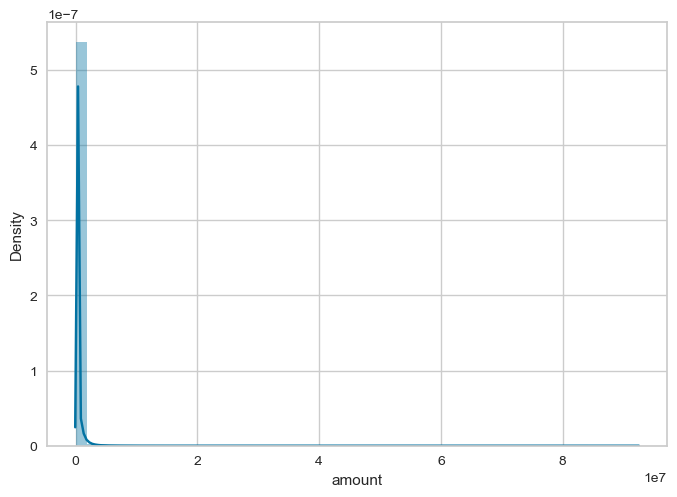

In [13]:
ax = sns.distplot(train['amount'])

<Axes: >

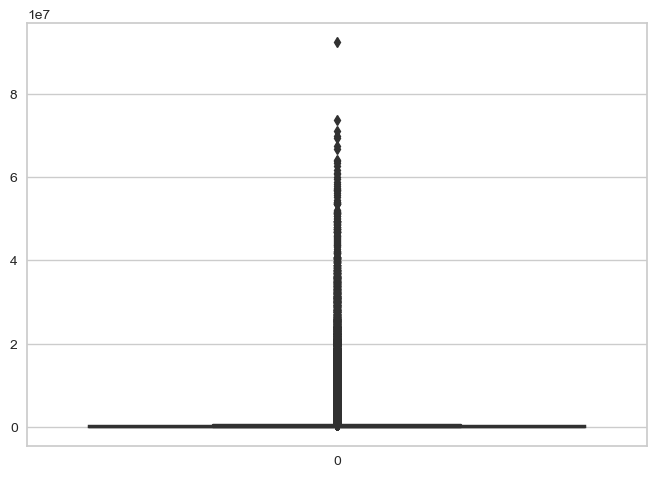

In [14]:
sns.boxplot(data=train['amount'], saturation=.3) #Saturation is for colour intensity.

# skewness
If the skewness is closer to zero, it means the data is more symmetric.
Positive skewness means the right tail (higher values) of the distribution is longer or fatter than the left tail (lower values).
Negative skewness means the left tail of the distribution is longer or fatter than the right tail.
Reducing the Scale of Larger Values More: The logarithmic function grows slowly as its input increases. This means that larger values in your dataset are "shrunk" or reduced in scale more significantly than smaller values.This can pull in the longer right tail of a positively skewed distribution, making the distribution more symmetric.

Handling Zero or Negative Values: Adding 1 (+1) before applying the logarithm is a common practice to avoid the undefined logarithm of zero or negative numbers (since log(0) is undefined and log of negative numbers is complex). 

Effect on Distribution: When you apply a log transformation to a positively skewed distribution, the lower values (closer to zero) are less affected, while the higher values are scaled down substantially. This typically reduces the skewness, making the distribution more symmetric, or even sometimes slightly left-skewed. 

And there every amount got log(x) +1

In [15]:
amount_corrected= np.log(train['amount' ]+1)

print(train['amount'].skew())

print(amount_corrected.skew())

31.050928455018084
-0.5549658313745637


We go from highly skewed to moderated data

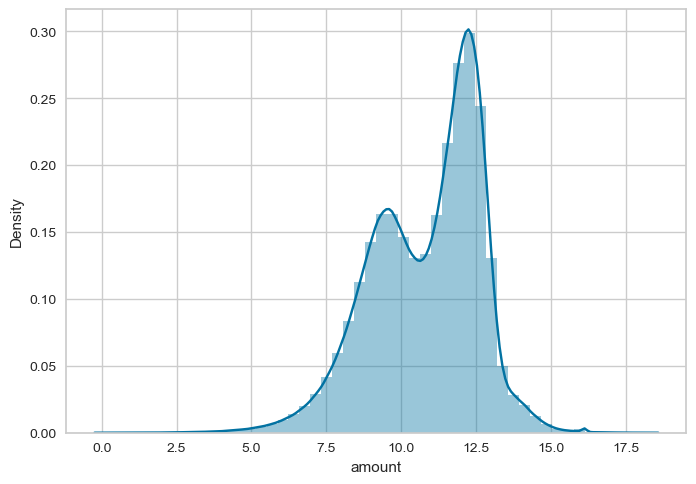

In [16]:
ax = sns.distplot(amount_corrected)

As we see data become more normal.

# Kurtosis
Describe:

· Kurtosis is one of the two measures that quantify shape of a distribution. kutosis determine the volume of the outlier

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers.

· Kurtosis describes the peakedness of the distribution.

· If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.

· A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

· A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

· Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis. This makes the normal distribution kurtosis equal 0.

Important Notes:

· Along with skewness, kurtosis is an important descriptive statistic of data distribution. However, the two concepts must not be confused with each other. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

· It is the sharpness of the peak of a frequency-distribution curve .It is actually the measure of outliers present in the distribution.

· High kurtosis in a data set is an indicator that data has heavy outliers.

· Low kurtosis in a data set is an indicator that data has lack of outliers.

The kurtosis of a normal distribution is 3.
If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.

In [17]:
kurtosis= pd.DataFrame(train.kurtosis(),columns=['Kurtosis'])
kurtosis.head(8)

,Kurtosis
step,0.246047
amount,1803.410673
oldbalanceOrig,32.875430
newbalanceOrig,32.003795
oldbalanceDest,950.015902
newbalanceDest,863.076045
isFraud,818.015079


In [18]:
kurtosis[(kurtosis['Kurtosis']>=3) |(kurtosis['Kurtosis']<=-3) ].index

Index(['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [19]:
amount_corrected.kurtosis()

0.18257833330041562

As we see again data preprocessing is really so important to correct our data , i will do this step on depth in the next part .

# Variance :
Features with low variance should be eliminated.

In [20]:
var= train.var().sort_values(ascending =True )
var_df= pd.DataFrame({'var':var})
var_df.head(10)

,var
isFraud,1.213571e-03
step,1.990008e+04
amount,3.643704e+11
oldbalanceOrig,8.351864e+12
newbalanceOrig,8.561904e+12
oldbalanceDest,1.155268e+13
newbalanceDest,1.350043e+13


Quantile data :

In [21]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

step                  179.00
amount             195326.90
oldbalanceOrig     107346.00
newbalanceOrig     144365.15
oldbalanceDest     943866.12
newbalanceDest    1112791.08
isFraud                 0.00
dtype: float64


In [22]:
train_num=train.select_dtypes(exclude=['category']) 
df_out = train_num[~((train_num < (Q1 - 1.5 * IQR))|(train_num > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
del train_num 
del df_out 

(4320075, 10)


Identifying outliers in data is an important part of statistical analyses. One simple rule of thumb (due to John Tukey) for finding outliers is based on the quartiles of the data: the first quartile  Q1
  is the value  ≥1/4
  of the data, the second quartile  Q2
  or the median is the value  ≥1/2
  of the data, and the third quartile  Q3
  is the value  ≥3/4
  of the data. The interquartile range,  IQR
 , is  Q3−Q1
 .

Tukey's rule says that the outliers are values more than  1.5
  times the interquartile range from the quartiles --- either below  Q1−1.5IQR
 , or above  Q3+1.5IQR
 .

(4320075, 7) this is the shape of data keeped after eliminating outliers

# Stat Analysis: shape , mean,median...

In [23]:
# shape of our tain data 
train.shape

(6351193, 10)

In [24]:
# stat Analysis
train.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6351193.0,2.425553e+02,1.410676e+02,1.0,155.00,238.00,334.00,6.990000e+02
amount,6351193.0,1.798155e+05,6.036310e+05,0.0,13388.29,74864.83,208715.19,9.244552e+07
oldbalanceOrig,6351193.0,8.347957e+05,2.889959e+06,0.0,0.00,14153.00,107346.00,5.958504e+07
newbalanceOrig,6351193.0,8.561696e+05,2.926073e+06,0.0,0.00,0.00,144365.15,4.958504e+07
oldbalanceDest,6351193.0,1.101043e+06,3.398924e+06,0.0,0.00,133086.55,943866.12,3.560159e+08
newbalanceDest,6351193.0,1.225372e+06,3.674293e+06,0.0,0.00,214919.01,1112791.08,3.561793e+08
isFraud,6351193.0,1.215047e-03,3.483635e-02,0.0,0.00,0.00,0.00,1.000000e+00


# Visual Exploratory

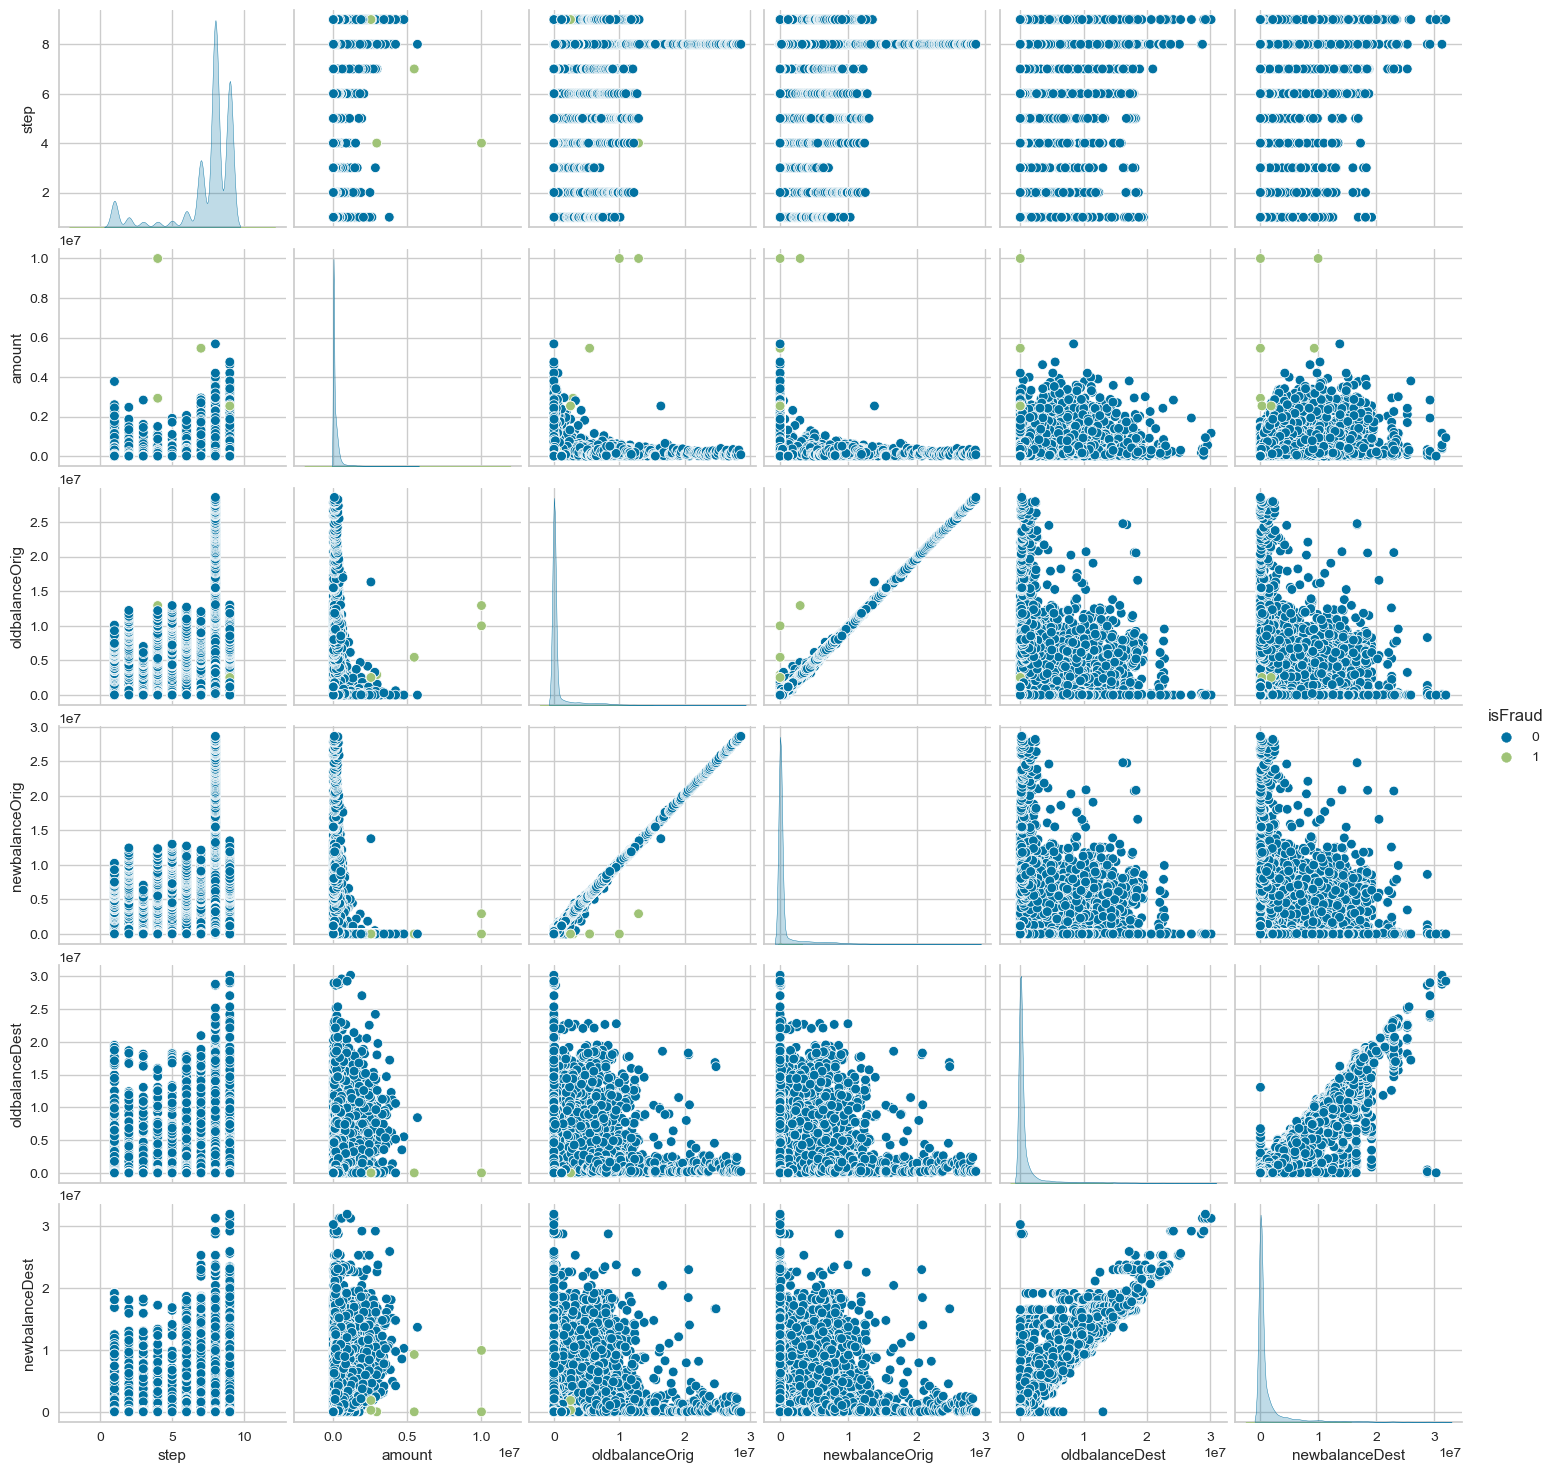

In [25]:
sns.pairplot(train.iloc[0:50000], hue= 'isFraud')

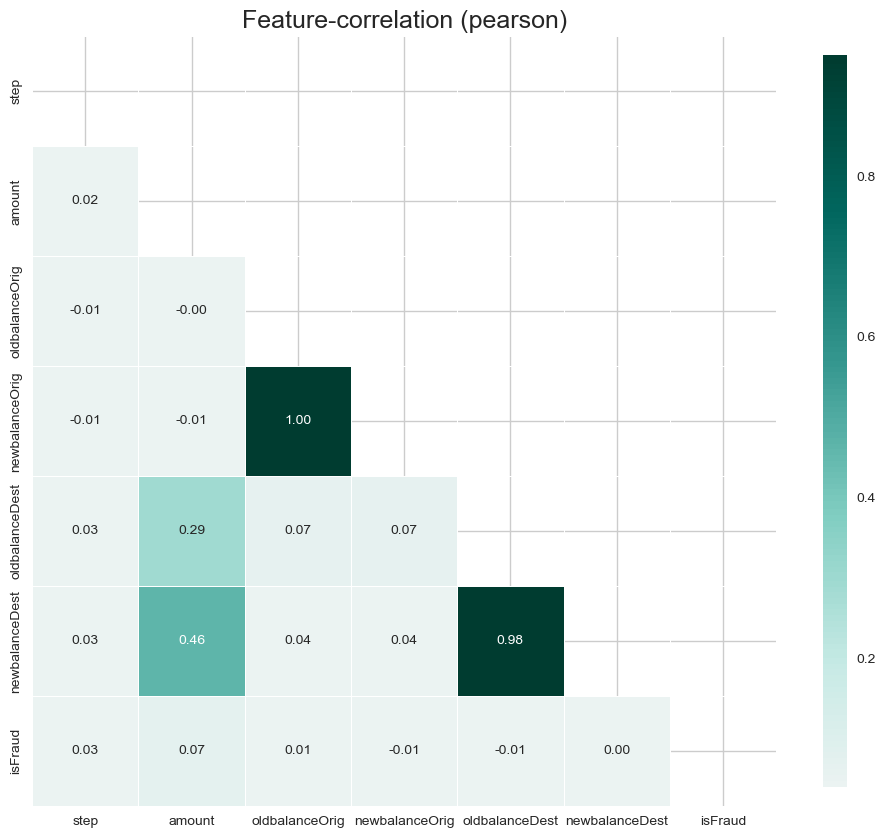

In [26]:
plot = klib.corr_plot(train,  figsize=(12,10))

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

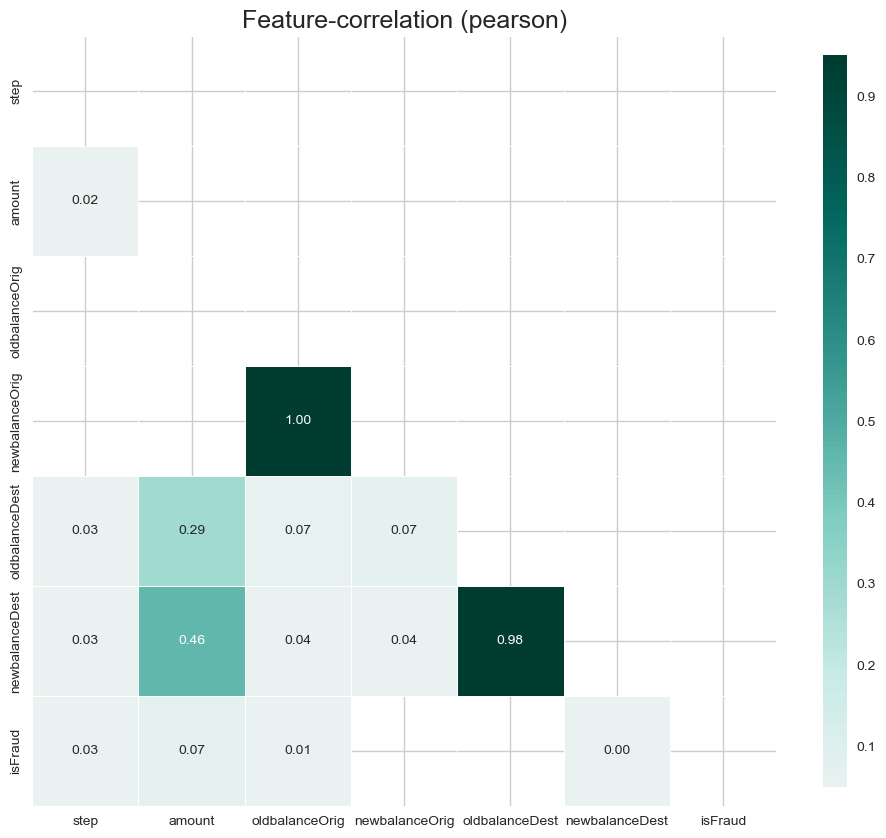

In [27]:
klib.corr_plot(train, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
#klib.corr_plot(train, split='neg') # displaying only negative correlations

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='step', ylabel='Density'>

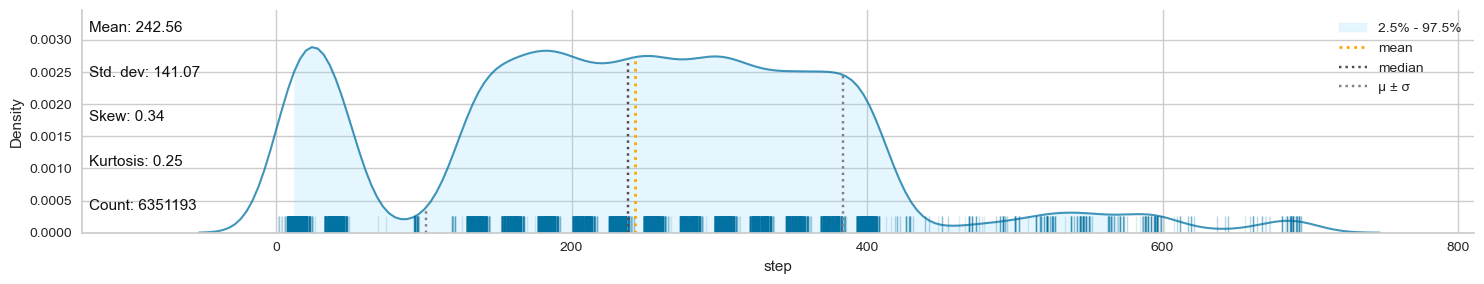

In [28]:
klib.dist_plot(train[['step',  'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PAYMENT'),
  Text(1, 0, 'TRANSFER'),
  Text(2, 0, 'CASH_OUT'),
  Text(3, 0, 'DEBIT'),
  Text(4, 0, 'CASH_IN')])

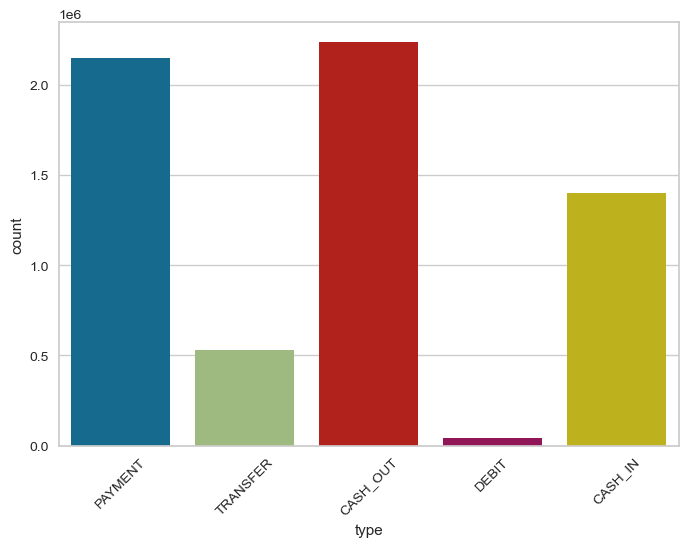

In [29]:
g= sns.countplot(x='type', data=train)
plt.xticks(rotation=45)

# Convert Dtypes :

In [30]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

Define the model features and target

Extract X and y

In [31]:
# Pour le train test
target= "isFraud"
X = train.drop(target, axis='columns')# axis=1
y = train[target].to_numpy()

# Num/Cat Features
we should extract them and see what we should do for each one

In [32]:
cat_columns = X.select_dtypes(exclude=['int64','int16','float32','float64','int8']).columns
num_columns = X.select_dtypes(include=['int64','int16','float32','float64','int8']).columns

# Numerical features distribution

# Histograms of numerical features

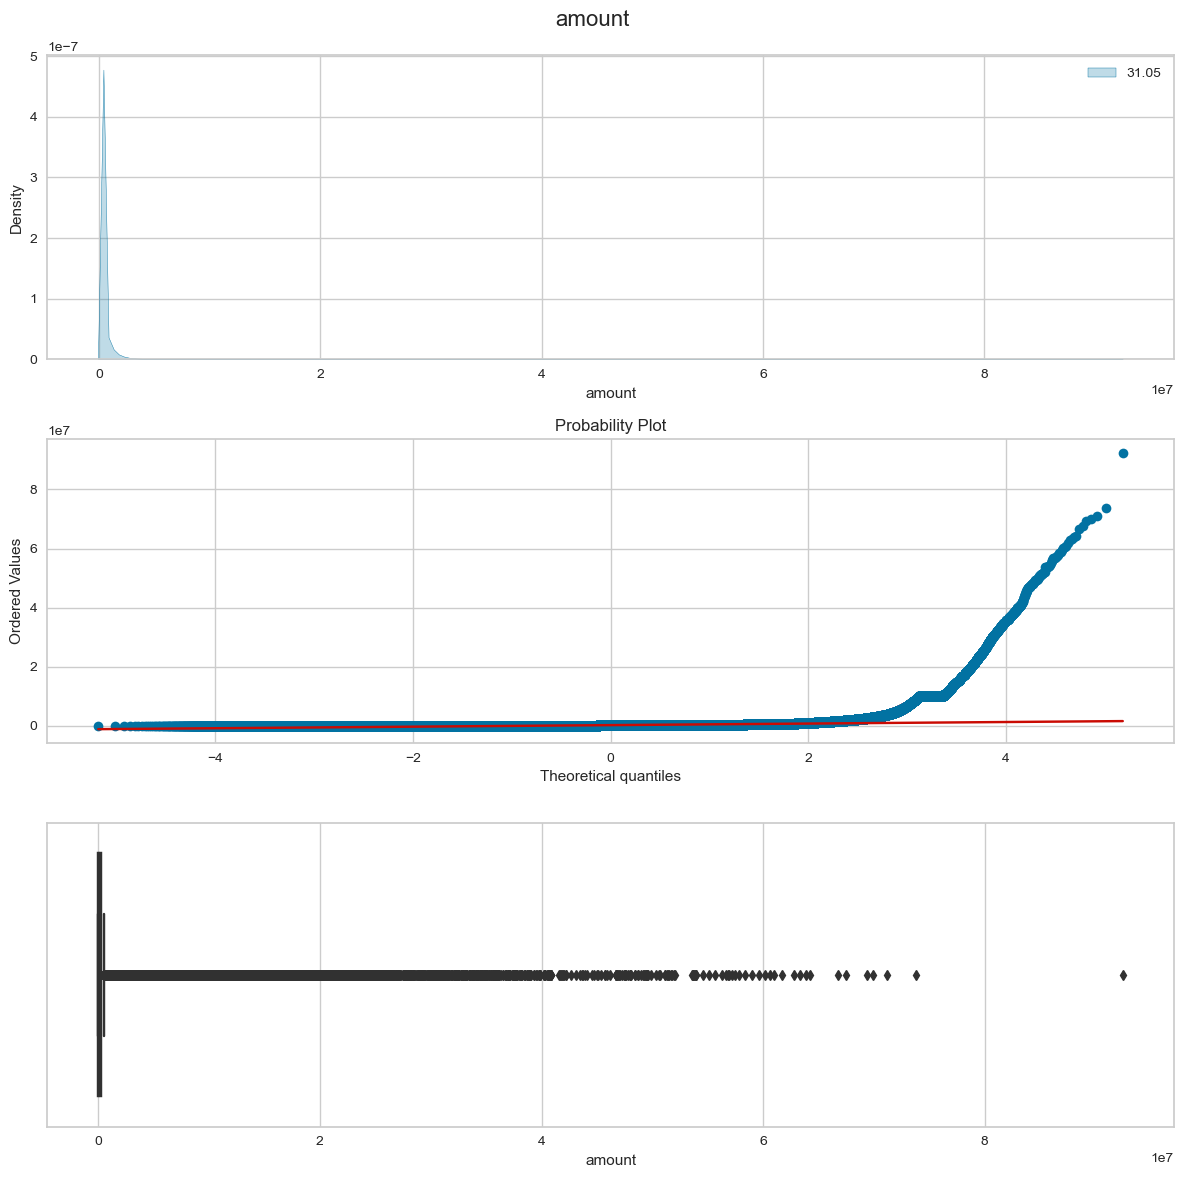

In [33]:
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
f.suptitle('amount', fontsize=16)
g = sns.kdeplot(train['amount'], shade=True, label="%.2f"%(train['amount'].skew()), ax=axes[0])
g = g.legend(loc="best")
stats.probplot(train['amount'], plot=axes[1])
sns.boxplot(x='amount', data=train, orient='h', ax=axes[2]);
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

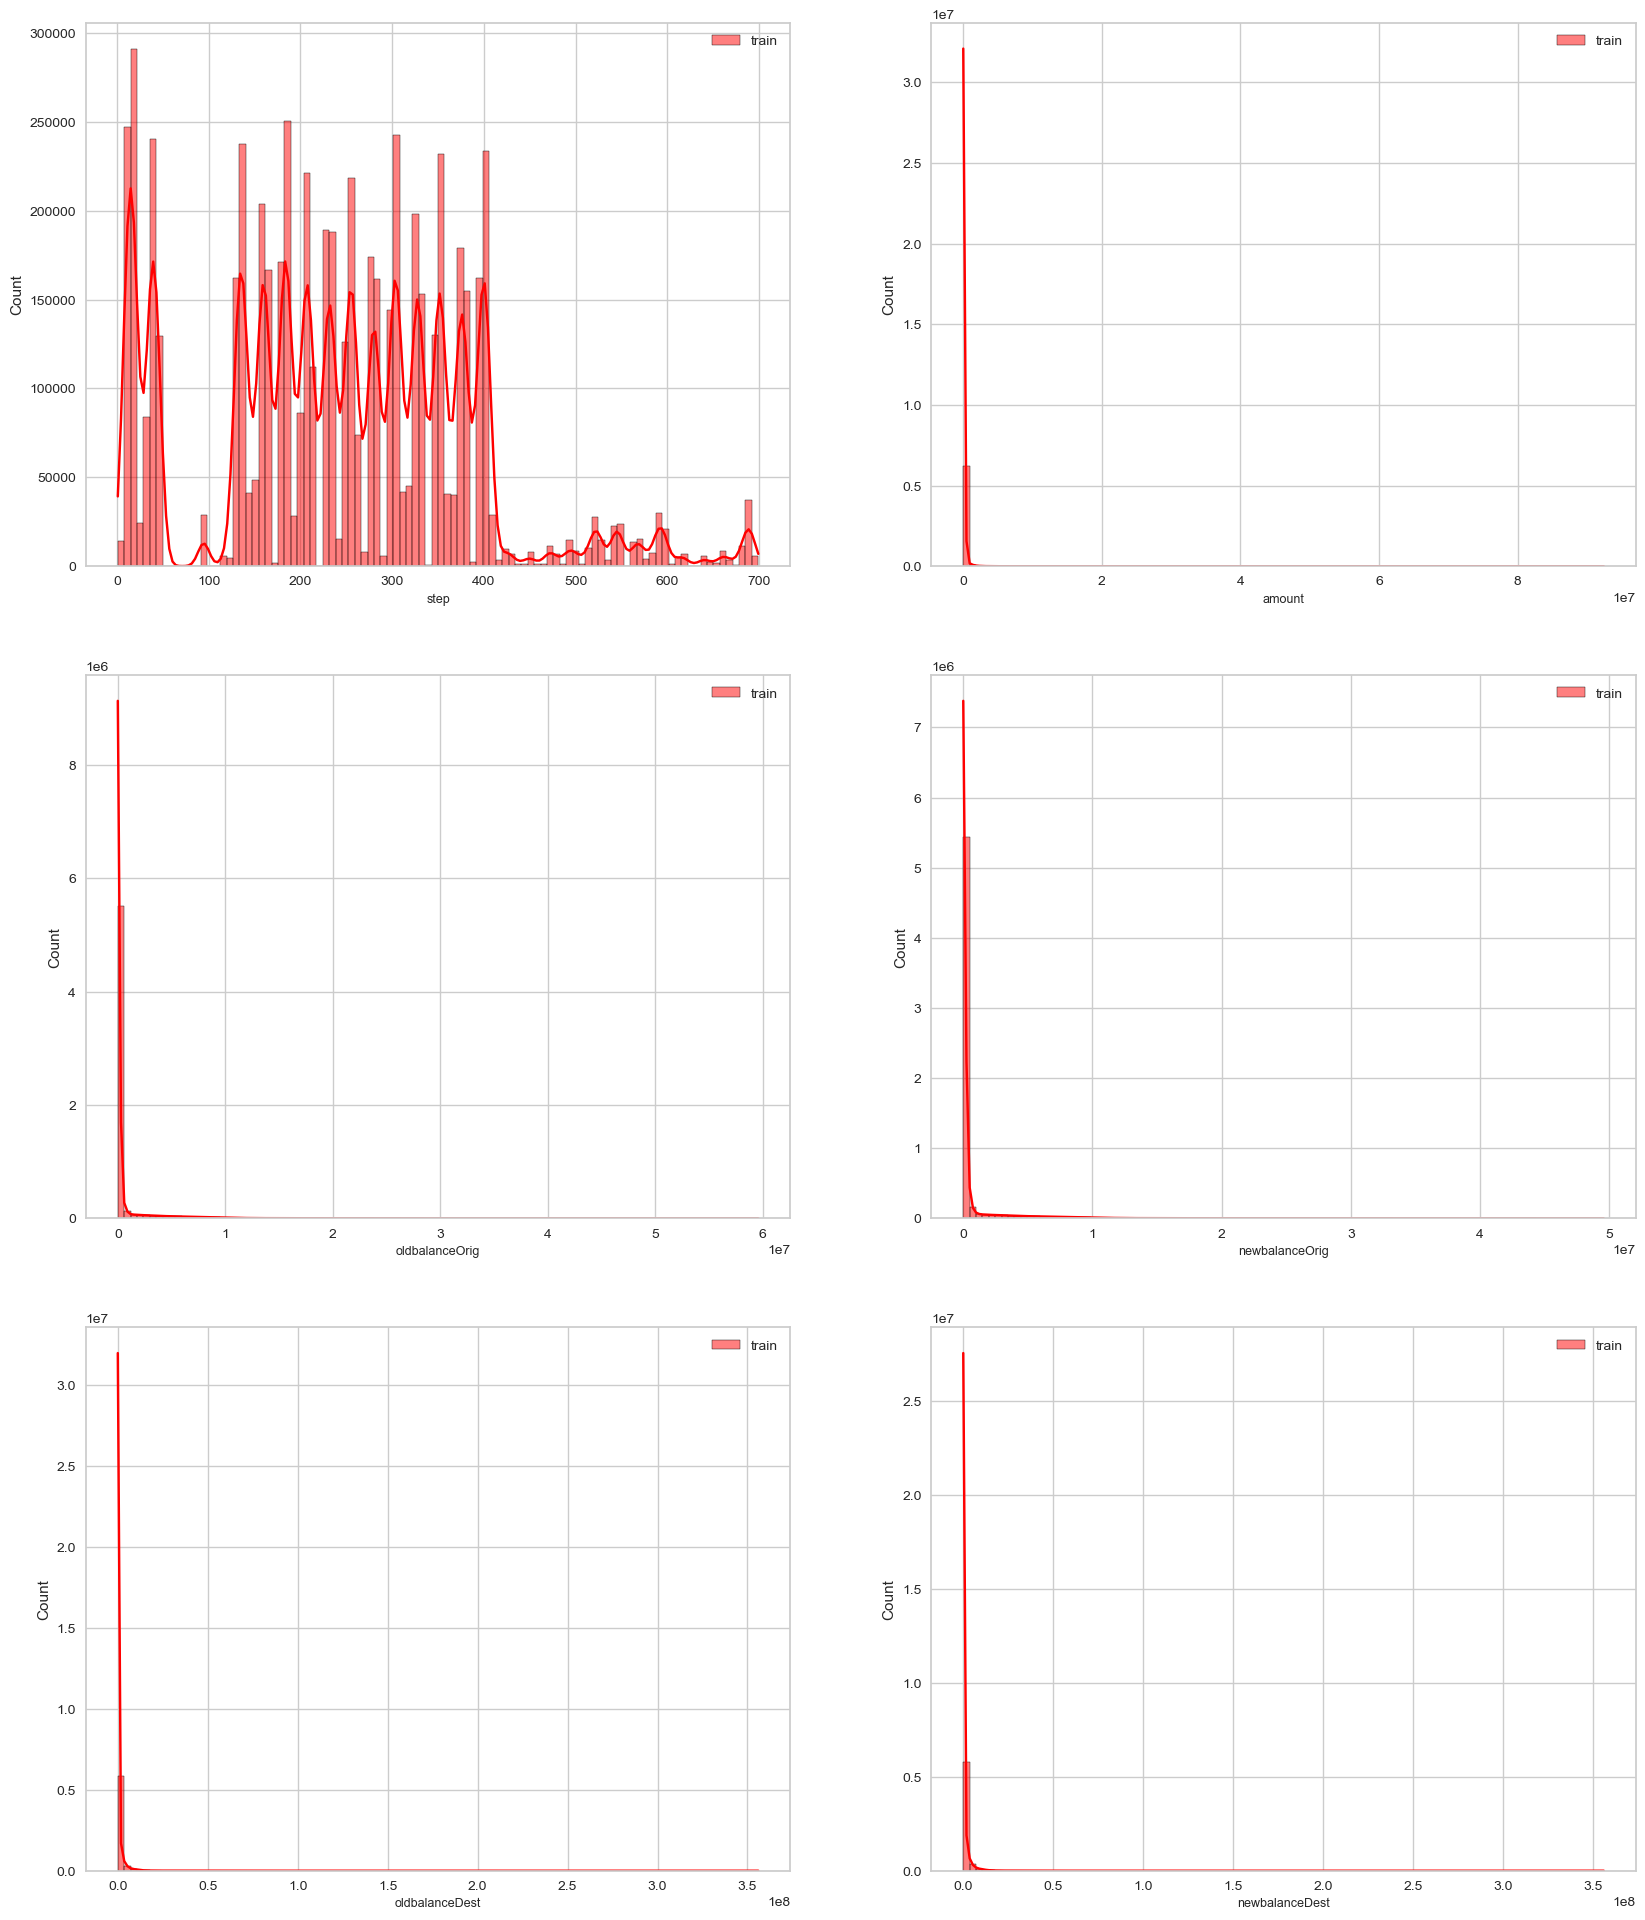

In [34]:
# Numerical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(3, 2,figsize=(20, 24))
for feature in num_columns:
    plt.subplot(3, 2,i)
    sns.histplot(train[feature],color="red", kde=True,bins=100, label='train')
    # sns.histplot(test[feature],color="olive", kde=True,bins=100, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

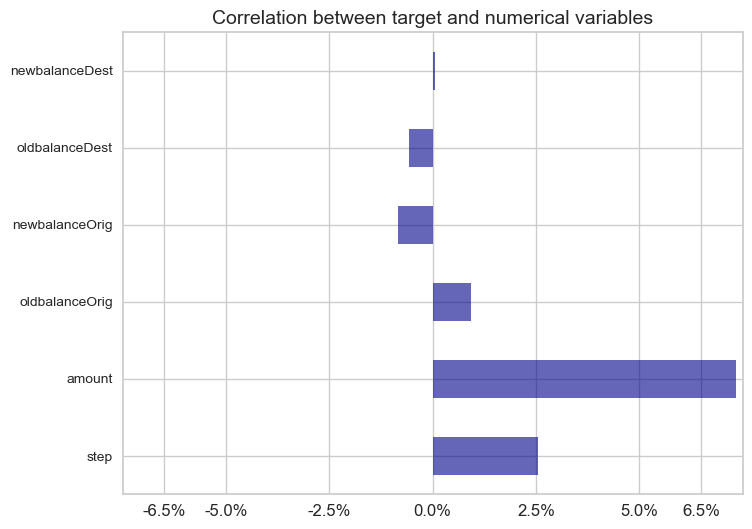

In [35]:
train.corr()['isFraud'][:-1].plot.barh(figsize=(8,6),alpha=.6,color='darkblue')
plt.xlim(-.075,.075);
plt.xticks([-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065],
           [str(100*i)+'%' for i in [-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065]],fontsize=12)
plt.title('Correlation between target and numerical variables',fontsize=14);

In [36]:
# Correlation
train.corr().style.background_gradient(cmap='viridis')

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022354,-0.009113,-0.009201,0.028303,0.026508,0.025495
amount,0.022354,1.000000,-0.003543,-0.008153,0.294792,0.460065,0.073346
oldbalanceOrig,-0.009113,-0.003543,1.000000,0.998857,0.066301,0.042019,0.009226
newbalanceOrig,-0.009201,-0.008153,0.998857,1.000000,0.067852,0.041853,-0.008322
oldbalanceDest,0.028303,0.294792,0.066301,0.067852,1.000000,0.976550,-0.005657
newbalanceDest,0.026508,0.460065,0.042019,0.041853,0.976550,1.000000,0.000496
isFraud,0.025495,0.073346,0.009226,-0.008322,-0.005657,0.000496,1.000000


# Box plot of numerical columns

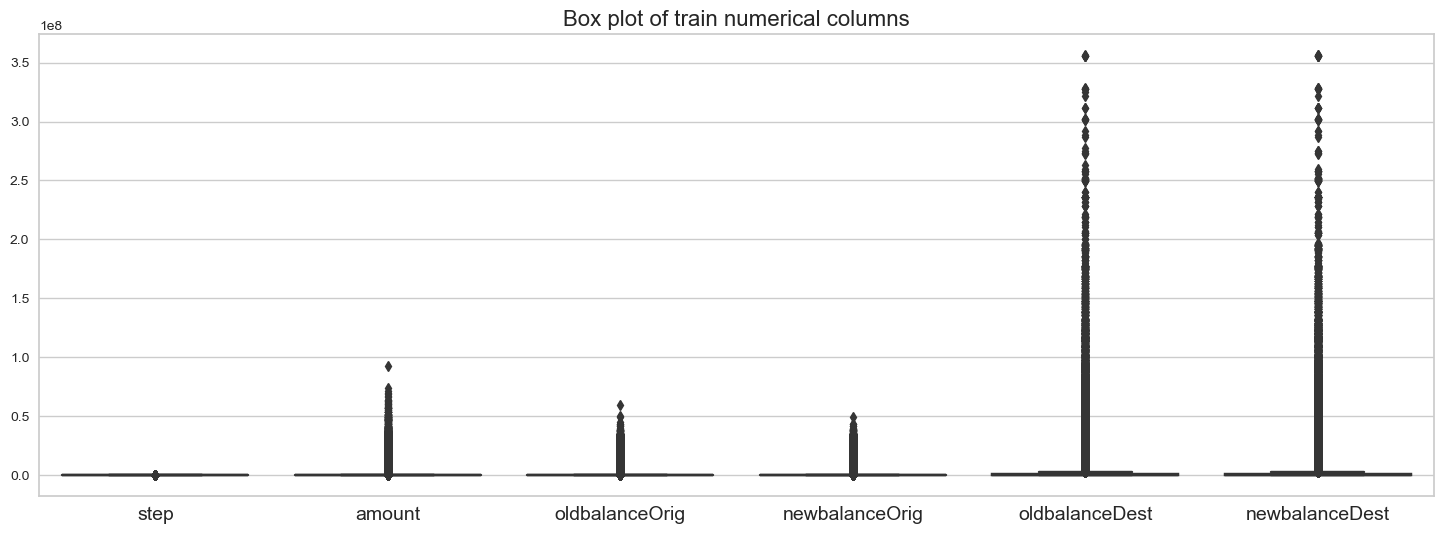

In [37]:
v0 = sns.color_palette(palette='viridis').as_hex()[0]
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=train[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of train numerical columns', fontsize=16);

Cat Colums
Number of categorical unique values

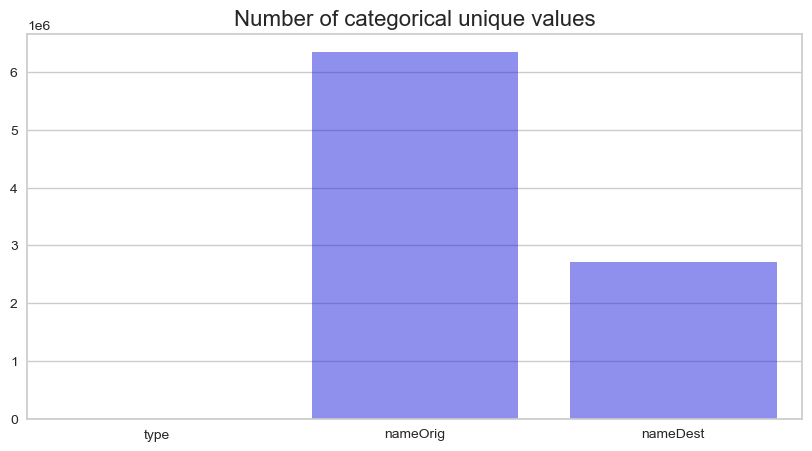

In [38]:
fig = plt.figure(figsize=(10,5))
sns.barplot(y=train[cat_columns].nunique().values, x=train[cat_columns].nunique().index, color='blue', alpha=.5)
plt.xticks(rotation=0)
plt.title('Number of categorical unique values',fontsize=16);

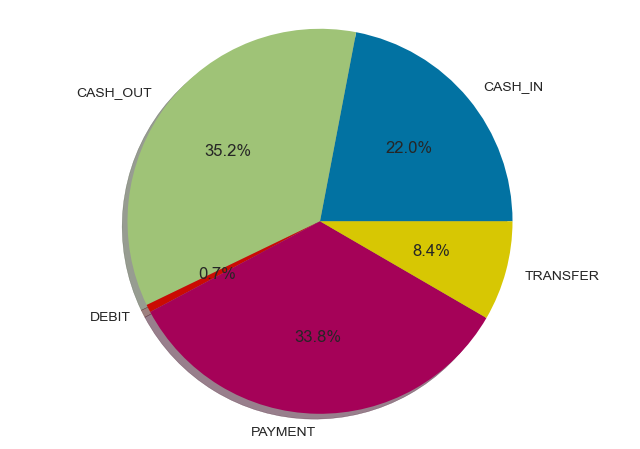

In [39]:
labels = train['type'].astype('category').cat.categories.tolist()
counts = train['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

<Figure size 800x550 with 0 Axes>

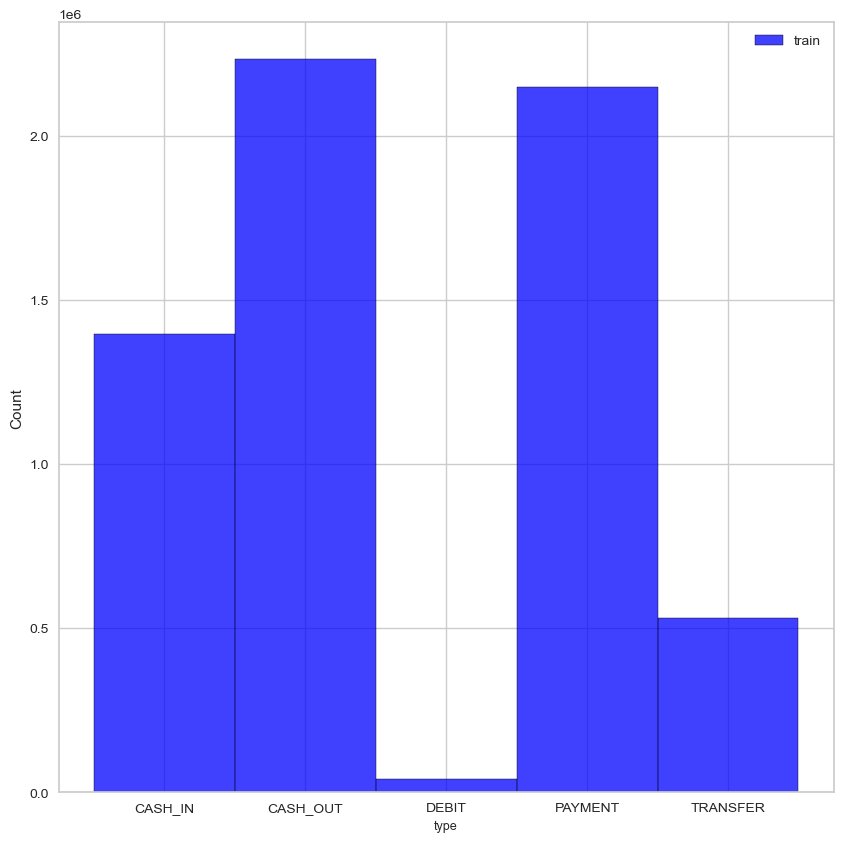

In [40]:
# Categorical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(1, 1,figsize=(10,10))
for feature in ['type']:
    plt.subplot(1, 1,i)
    sns.histplot(train[feature],color="blue", label='train')
    #sns.histplot(test[feature],color="olive", label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

# Target Class distribution

In [41]:
train.isFraud.value_counts()

0    6343476
1       7717
Name: isFraud, dtype: int64

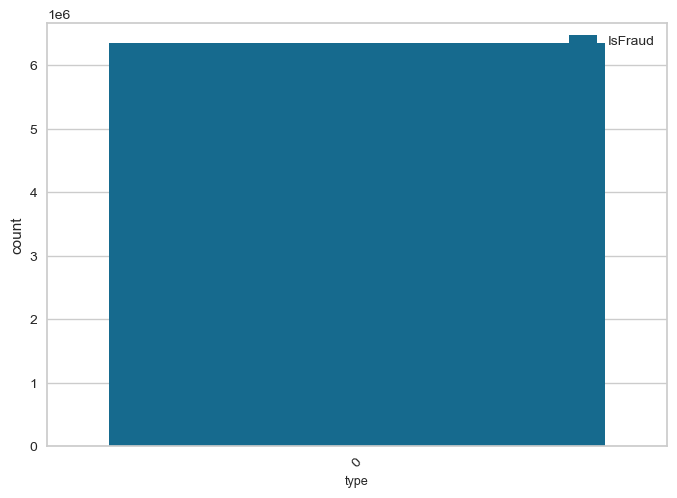

In [42]:
# Categorical features distribution 
plt.figure()
sns.countplot(train['isFraud'], label='IsFraud')
plt.xlabel(feature, fontsize=9); plt.legend()
plt.xticks(rotation=45)
plt.show()

# Violin plot of target with features

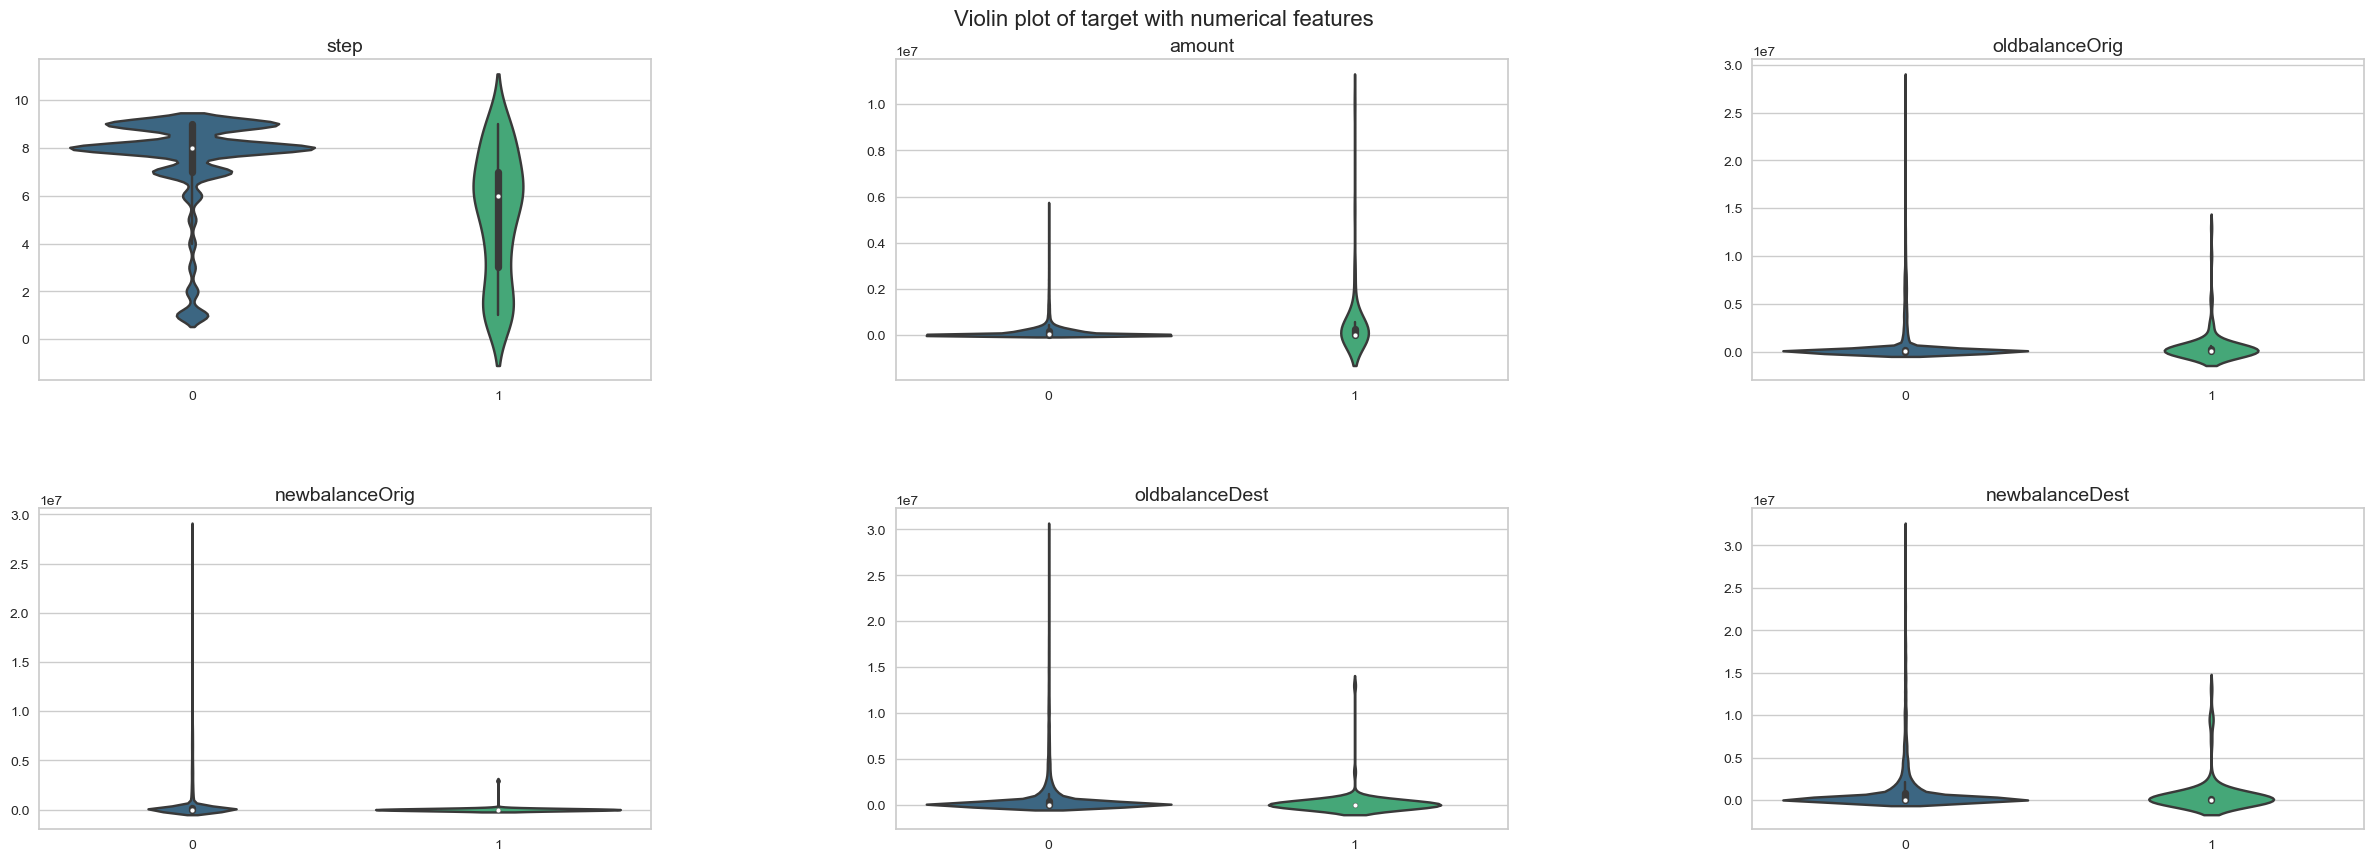

In [43]:
fig = plt.figure(figsize=(30,10))
grid =  gridspec.GridSpec(2,3,figure=fig,hspace=.4,wspace=.4)
n =0
for i in range(2):
    for j in range(3):
        ax = fig.add_subplot(grid[i, j])
        sns.violinplot(data =  train.iloc[0:50000], y = num_columns[n] , x ='isFraud' ,ax=ax, alpha =.7, fill=True,palette='viridis')
        ax.set_title(num_columns[n],fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('Violin plot of target with numerical features', fontsize=16,y=.93);

# KDE plot of target with features

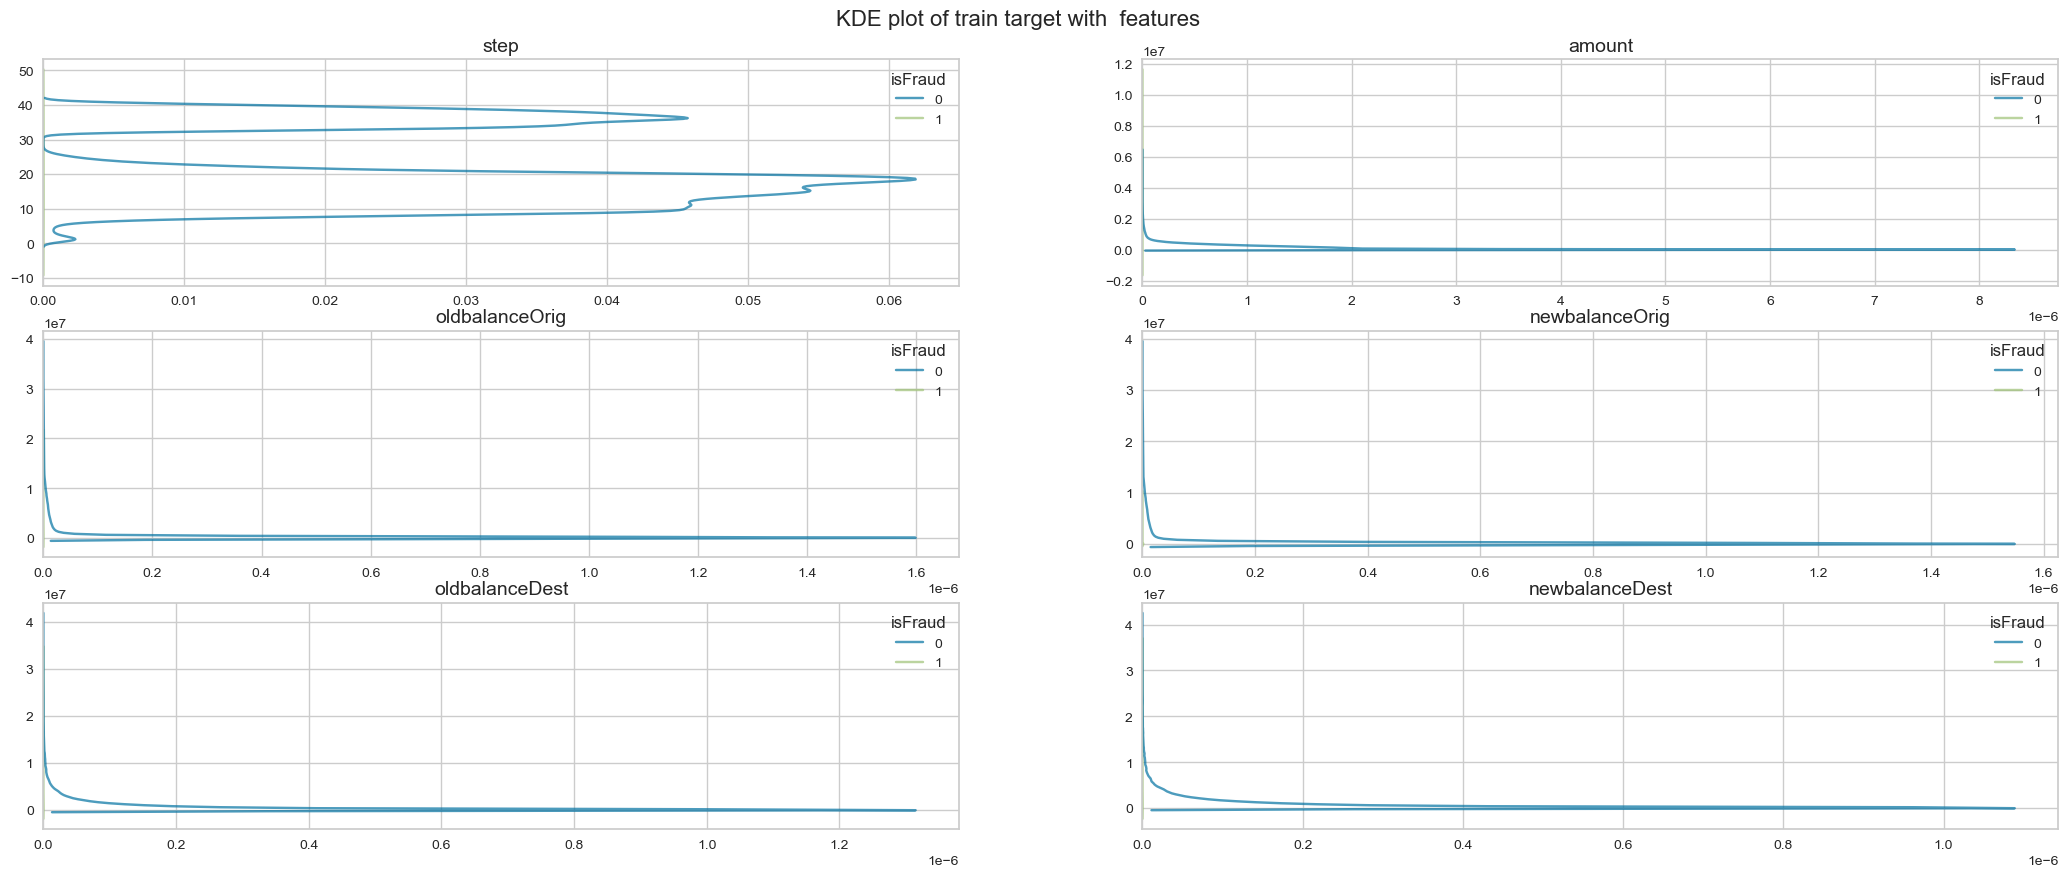

In [44]:
fig = plt.figure(figsize=(26,10))
grid =  gridspec.GridSpec(3,2,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(3):
    for j in range(2):
        ax = fig.add_subplot(grid[i, j])
        sns.kdeplot(data = train.iloc[0:800000,:], y = num_columns[n],  hue = 'isFraud',ax=ax, alpha =.7, fill=False)
        ax.set_title(num_columns[n],fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('KDE plot of train target with  features', fontsize=16,y=.93);

As we see we can't detect wich features have diffrent distubition with the target as we have a such imb data .

# t-SNE visualization of high-dimensional data
t-SNE intuition t-SNE is super powerful, but do you know exactly when to use it? When you want to visually explore the patterns in a high dimensional dataset.

In [45]:
%%time 
m = TSNE()
df_numeric =train.iloc[0:8000]._get_numeric_data()
df_numeric=df_numeric.dropna()
X_train =RobustScaler().fit_transform(df_numeric)
del df_numeric 
# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(X_train)
print(tsne_features.shape)

(8000, 2)
CPU times: total: 2min 45s
Wall time: 44.5 s


<function matplotlib.pyplot.show(close=None, block=None)>

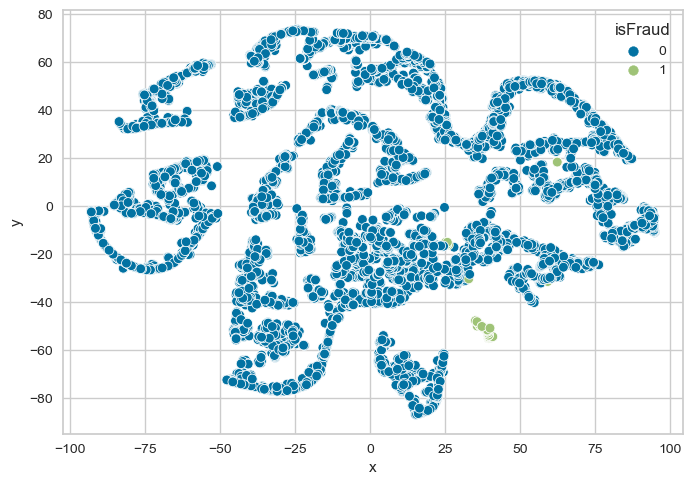

In [46]:
trainessai=train.iloc[0:8000]
trainessai['x']=tsne_features[:, 0]
trainessai['y']=tsne_features[:, 1]
# Color the points according to Army Component
sns.scatterplot(x='x', y='y', hue='isFraud', data=trainessai)
# Show the plot
plt.show

As we see non linear transformation give us some cluster of fraud well separated from non fraud data

# Kmeans :
Let's see if there is hidden cluster

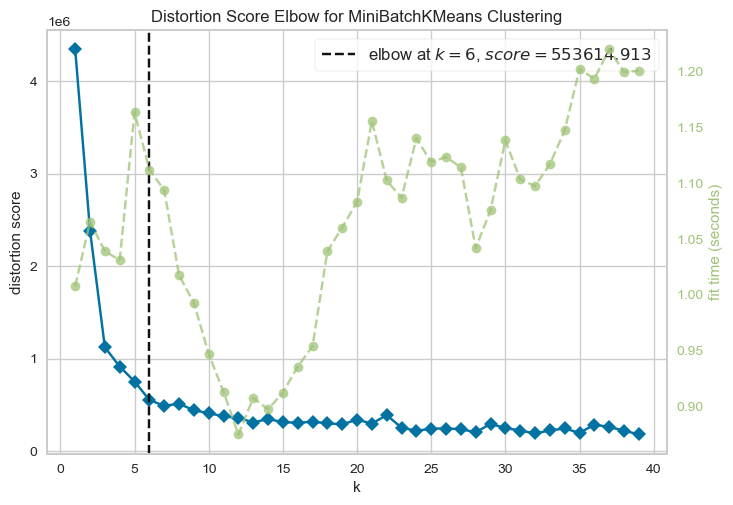

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# Define K-means model 
kmeans = MiniBatchKMeans( random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,40))
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [48]:
kmeans = MiniBatchKMeans(n_clusters=7 ,random_state=42)
kmean_label= kmeans.fit_predict(X_train)
print(kmean_label)

[0 0 0 ... 6 0 6]


In [49]:
trainessai['cluster'] = kmean_label
trainessai['cluster'] = trainessai['cluster'].astype('object')

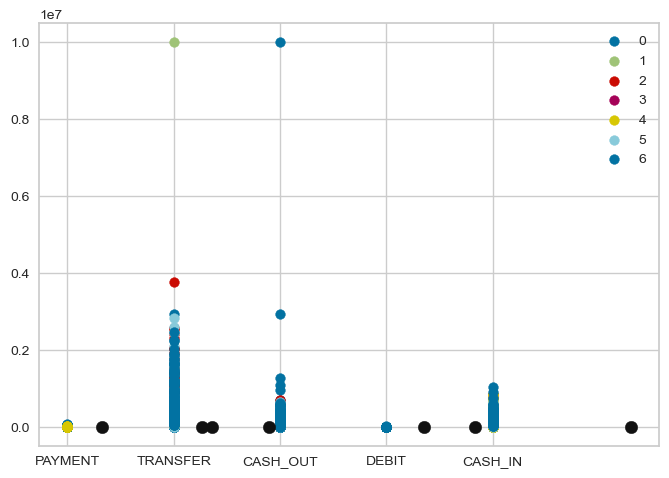

In [50]:
#Getting the Centroids
centroids = kmeans.cluster_centers_

#Getting unique labels
u_labels = np.unique(kmean_label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(trainessai.iloc[kmean_label == i ,1] , trainessai.iloc[kmean_label == i , 2] , label = i)

plt.scatter(centroids[:,1] , centroids[:,2] , s = 80, color = 'k')
plt.legend()
plt.show()

In [51]:
red = sns.light_palette("red", as_cmap=True)

cross_tab=pd.crosstab(trainessai['cluster'], trainessai['isFraud'], margins = True)

H=cross_tab/cross_tab.loc["All"] # Divide by column totals

H.style.background_gradient(cmap=red)

isFraud,0,1,All
cluster,,,
0,0.765188,0.924242,0.766500
1,0.058735,0.015152,0.058375
2,0.016889,0.015152,0.016875
3,0.017393,0.000000,0.017250
4,0.070456,0.000000,0.069875
5,0.022309,0.000000,0.022125
6,0.049029,0.045455,0.049000
All,1.000000,1.000000,1.000000


# Create test and train groups

In [52]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0,stratify=y )
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

635120 rows in test set vs. 5716073 in training set. 9 Features.


# What should we do for each colmun
Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.

Cat Features

In [53]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float32','float64','int8']).columns

Num Features

In [54]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float32','float64','int8']).columns

In [55]:
all_columns = (num_columns.append(cat_columns))
print(cat_columns)
print(num_columns)
print(all_columns)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')
Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')
Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type', 'nameOrig', 'nameDest'],
      dtype='object')
